### Question 1: Wine classification (50)

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

In [34]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

1. Split the data into training and testing(20%). Scale the data. 

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

2. Fit a SVM model, using the type of wine as the target value, and Alcohol	and Malicacid as the features. Report the classification accuracy. 

In [36]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_2feats_train = X_train_scaled[:, :2]
X_2feats_test = X_test_scaled[:, :2]

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier on the unscaled training data
svm_classifier.fit(X_2feats_train, y_train)
svm_pred = svm_classifier.predict(X_2feats_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print the accuracies
print(f"Accuracy (scaled data): {svm_accuracy}")

Accuracy (scaled data): 0.8611111111111112


C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3. Visualize the result from previous question. 

Use the scaled X train and y train values to plot.

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


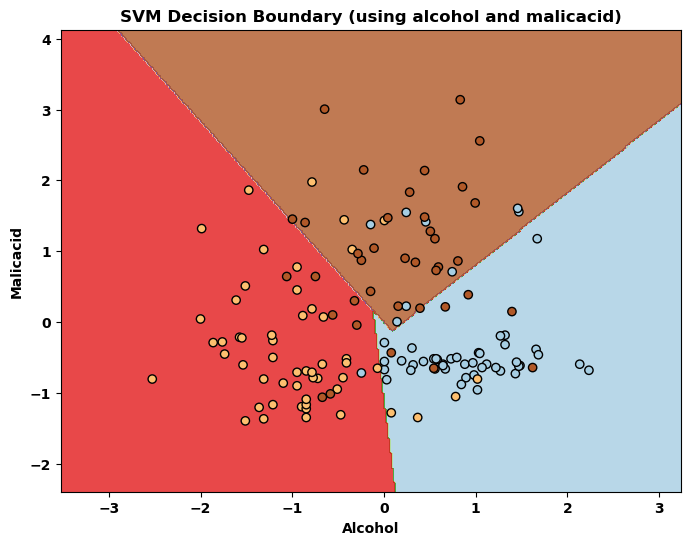

In [37]:
import matplotlib.pyplot as plt

y_train = np.array(y_train)

# Fit SVM model
svm_classifier.fit(X_2feats_train, y_train)

# Create a meshgrid of points to make predictions
x_min, x_max = X_2feats_train[:, 0].min() - 1, X_2feats_train[:, 0].max() + 1
y_min, y_max = X_2feats_train[:, 1].min() - 1, X_2feats_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions on the meshgrid
Z = svm_classifier.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_2feats_train[:, 0], X_2feats_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.title('SVM Decision Boundary (using alcohol and malicacid)')
plt.show()

4. Fit the SVM model, using all features and type of wines as the target value. Divide the training data into training and validation. Use the validation part to tune the parameter of kernel type and the value of C and then the training part to fit the model. Report the classification report table on test data, as well as the best parameters. 

In [5]:
# Split data
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.5, random_state=4400)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the hyperparameters to tune
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10]}

# Perform grid search cross-validation
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_valid, y_valid)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the classifier on the best hyperparameters
best_classifier = SVC(**best_params)
best_classifier.fit(X_train2, y_train2)

# Make predictions on the testing data
y_pred = best_classifier.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print("Best parameters: ", best_params)

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Best parameters:  {'C': 1, 'kernel': 'rbf'}


C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hafid\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

5. Now, use the Alcohol as the target and all the other features as the features. Fit a SVM and report the metrics. (No need to tune the parameters)

In [26]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X1 = wine.data.features 
X2 = wine.data.targets 
y = X1['Alcohol']
X = pd.concat([X1, X2], axis=1, ignore_index=True).iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4400)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svm_reg = SVR(kernel='linear').fit(X_train_scaled, y_train)
svm_pred = svm_reg.predict(X_test_scaled)

svm_mse = mean_squared_error(y_test, svm_pred)
print("MSE: ", svm_mse)

MSE:  0.28833175722415466


### Question 2: Explain the concepts (20)

1. Explain what is margin and support vector in the SVM (5)

Margin:

The margin in an SVM is the separation or "buffer zone" between the decision boundary (hyperplane) and the nearest data points of each class. It is the width of the corridor within which the SVM aims to position the decision boundary. Mathematically, the margin is defined as the perpendicular distance between the hyperplane and the closest data point (support vector) from any class.

Support Vectors:

Support vectors are the data points that are closest to the decision boundary (hyperplane). These are the critical data points that influence the positioning of the hyperplane and, therefore, the margin.

2. Explain the difference and similarity between SVC and SVR (10)

Difference:

SVC is used for classification, which means it's used to separate data into different categories or classes. It helps you decide which category a new data point belongs to.
SVR is used for regression, which means it's used to predict a numeric value or quantity. It helps you estimate a numeric value based on input data.

Similarity:

Both SVC and SVR use the concept of support vectors and a hyperplane to make decisions. In SVC, the hyperplane separates different classes, and in SVR, it predicts a numeric value. Both try to maximize the margin around the data points to make more reliable predictions or classifications.

3. Explain the difference of the definition of error in SVR and linear regression (5)

SVR defines error by considering a tolerance margin (ε-insensitive tube) around the target values. Predictions falling within this margin are deemed accurate and do not contribute to the loss function, while predictions outside the margin are considered errors. SVR is more focused on controlling the size of this margin and capturing errors within it.

Linear Regression defines error as the vertical distance between predicted values (in regression line) and actual data points. It aims to minimize these vertical distances, with no concept of a tolerance margin like SVR. Linear Regression seeks to minimize the squared vertical distances from the data points to the regression line.

### Question 3:  KNN with regression (30)

Following is a simulation data with three features. 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=3, noise=20, random_state=5220)
y = y + np.sin(X[:, 0] * 3) + X[:, 1] ** 2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5220)

1. Fit a KNN model. Tune the parameter of K and distance metric (Euclidean and Manhattan). Print the MSE with the best parameter. (15) 

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define the parameter grid for tuning
param_grid = {'n_neighbors': range(1, 21), 
               'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_reg = KNeighborsRegressor()
reg_grid = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
reg_grid.fit(X_train_scaled, y_train)

# Get the best parameter and best score from the grid search
best_params = reg_grid.best_params_

# Fit KNN model with the best parameter
knn_best = KNeighborsRegressor(**best_params)
knn_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test_scaled)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("Best Params.: ", best_params)

MSE:  724.5780434114346
Best Params.:  {'metric': 'euclidean', 'n_neighbors': 5}


2. Repeat the simulation process with the number of feature equal to 10. Redo the previous question. (15)

In [32]:
# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=20, random_state=5220)
y = y + np.sin(X[:, 0] * 3) + X[:, 1] ** 2

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5220)

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Define the parameter grid for tuning
param_grid = {'n_neighbors': range(1, 21), 
               'metric': ['euclidean', 'manhattan']}

# Fit KNN model with grid search for parameter tuning
knn_reg = KNeighborsRegressor()
reg_grid = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
reg_grid.fit(X_train_scaled, y_train)

# Get the best parameter and best score from the grid search
best_params = reg_grid.best_params_

# Fit KNN model with the best parameter
knn_best = KNeighborsRegressor(**best_params)
knn_best.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_best.predict(X_test_scaled)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("Best Params.: ", best_params)

MSE:  9125.760810538313
Best Params.:  {'metric': 'euclidean', 'n_neighbors': 5}
